In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# reading train data
train=pd.read_csv(r'C:\Users\Tesly Sabastian\Downloads\titanic\train.csv')

# reading test data
test=pd.read_csv(r'C:\Users\Tesly Sabastian\Downloads\titanic\test.csv')

In [68]:
# printing first five rows of the data set

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# number of rows and columns
train.shape 

(891, 12)

In [70]:
# column names
train.columns 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
# number of null values  in dataset
print("train",'\n',train.isnull().sum(),'\n\n' ,"test",'\n',test.isnull().sum())


train 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

 test 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [72]:
#replacing null values in test and train
train["Age"]=train["Age"].fillna(round(train["Age"].mean()))
test["Age"]=test["Age"].fillna(round(test["Age"].mean()))

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:

train["Fare"]=train["Fare"].fillna(round(train["Fare"].mean()))
test["Fare"]=test["Fare"].fillna(round(test["Fare"].mean()))

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

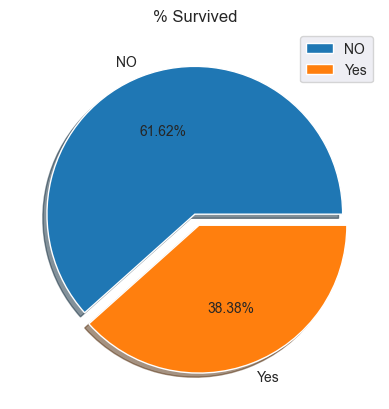

In [74]:
x = train['Survived'].value_counts(normalize=True)
plt.pie(x,autopct = "%1.2f%%",labels =['NO','Yes'],shadow = True, explode = [0, 0.08])
plt.legend(['NO','Yes']);
plt.title('% Survived');

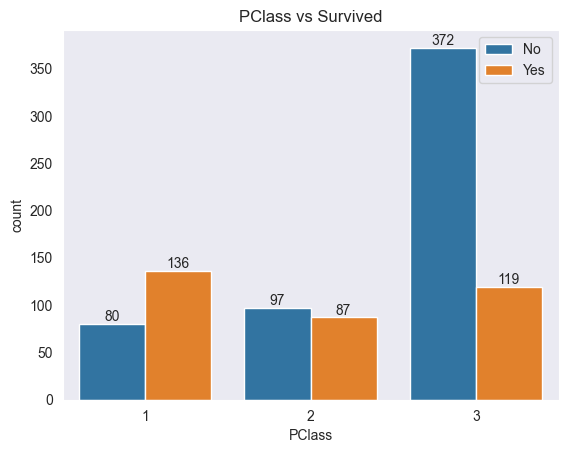

In [75]:
sns.set_style(style='dark')
fig,ax = plt.subplots()
x = sns.countplot(x = 'Pclass',data=train ,hue ='Survived' )
for i in x.containers:
    ax.bar_label(i)
plt.legend(['No','Yes'])
plt.xlabel('PClass')
plt.title('PClass vs Survived');

In [76]:
pd.DataFrame(round(train.groupby('Pclass')['Survived'].mean(),3)*100)

,Survived
Pclass,
1,63.0
2,47.3
3,24.2


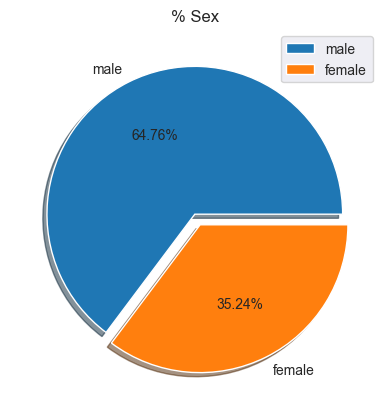

In [77]:
x = train['Sex'].value_counts(normalize=True)
plt.pie(x,autopct = "%1.2f%%",labels =['male','female'],shadow = True, explode = [0, 0.08])
plt.legend(['male','female']);
plt.title('% Sex');

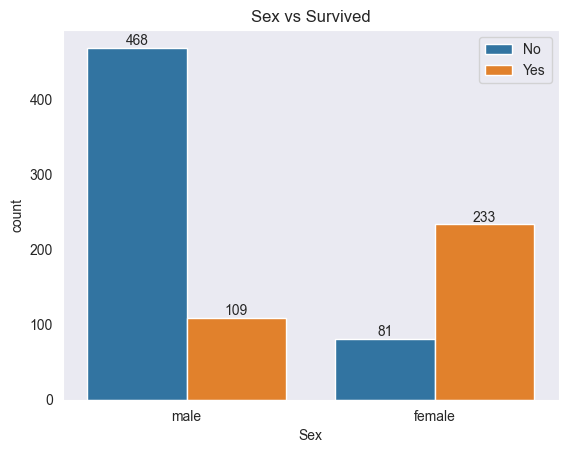

In [78]:
sns.set_style(style='dark')
fig,ax = plt.subplots()
x = sns.countplot(x = 'Sex',data=train ,hue ='Survived' )
for i in x.containers:
    ax.bar_label(i)
plt.legend(['No','Yes'])
plt.xlabel('Sex')
plt.title('Sex vs Survived');

In [79]:
round(train.groupby('Sex')['Survived'].value_counts(normalize=True),3)*100

Sex     Survived
female  1           74.2
        0           25.8
male    0           81.1
        1           18.9
Name: Survived, dtype: float64

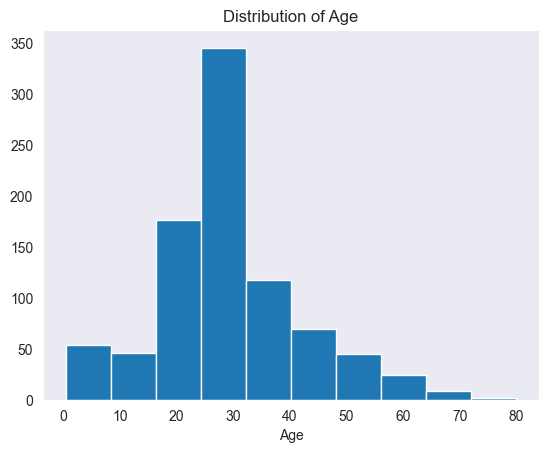

In [80]:
plt.hist(train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age');

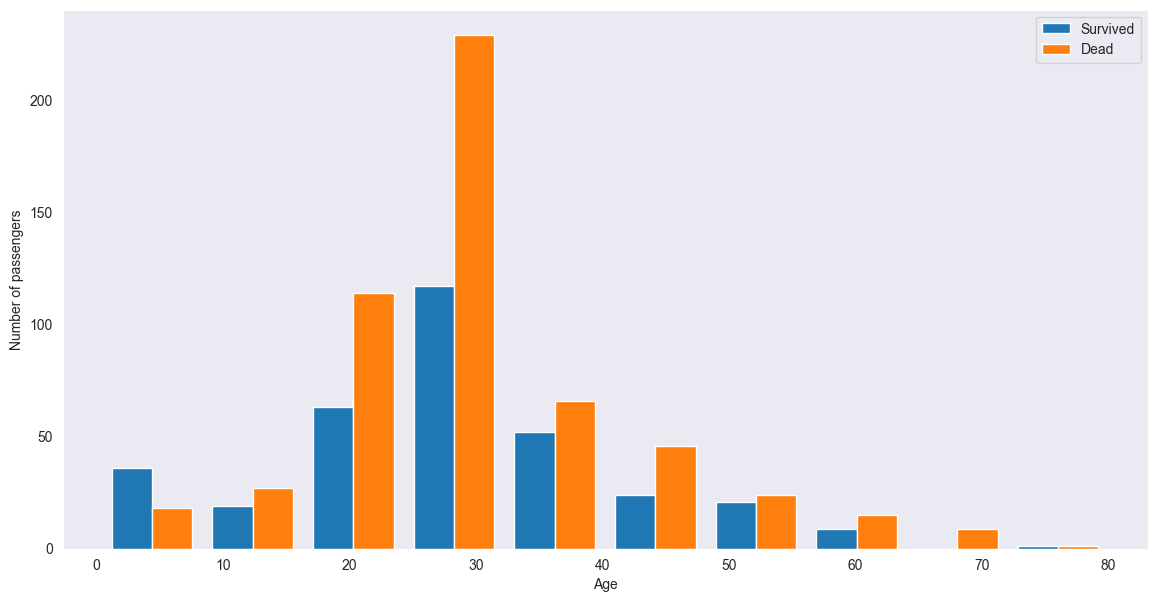

In [81]:
#visualizing survival based on the Age

figure = plt.figure(figsize=(14, 7))
plt.hist([train[train['Survived'] == 1]['Age'], train[train['Survived'] == 0]['Age']], 
         stacked=False, bins = 10, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

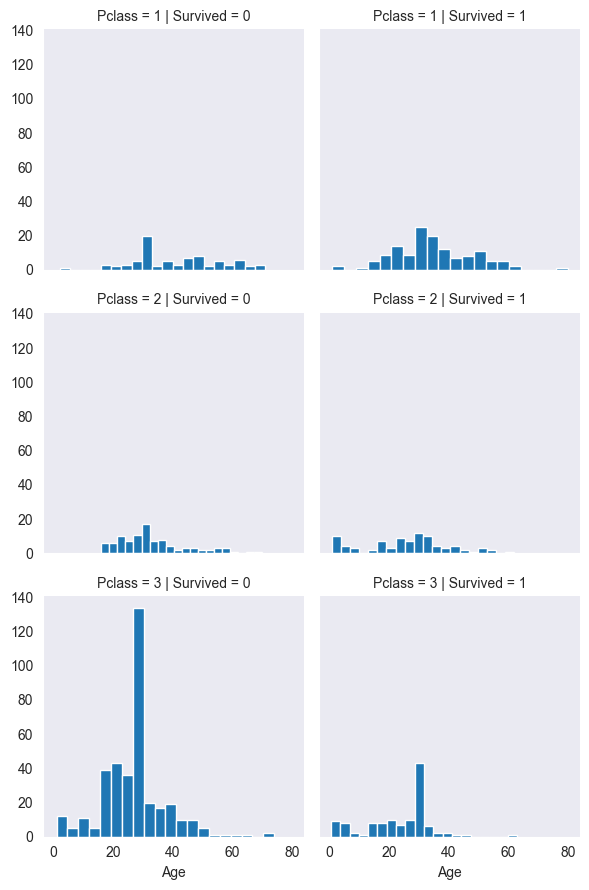

In [82]:
f =sns.FacetGrid(train,col='Survived',row ='Pclass')
f.map(plt.hist,'Age',bins = 20);

In [83]:
# SibSp	Parch
pd.DataFrame(round(train.groupby('SibSp')['Survived'].mean(),3)*100)

,Survived
SibSp,
0,34.5
1,53.6
2,46.4
3,25.0
4,16.7
5,0.0
8,0.0


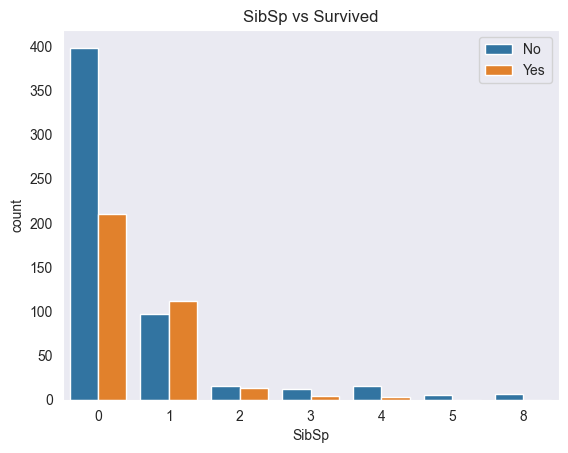

In [84]:
sns.countplot(x=train['SibSp'],hue=train['Survived'])
plt.legend(['No','Yes'])
plt.xlabel('SibSp')
plt.title('SibSp vs Survived');

In [85]:
pd.DataFrame(round(train.groupby('Parch')['Survived'].mean(),3)*100)

,Survived
Parch,
0,34.4
1,55.1
2,50.0
3,60.0
4,0.0
5,20.0
6,0.0


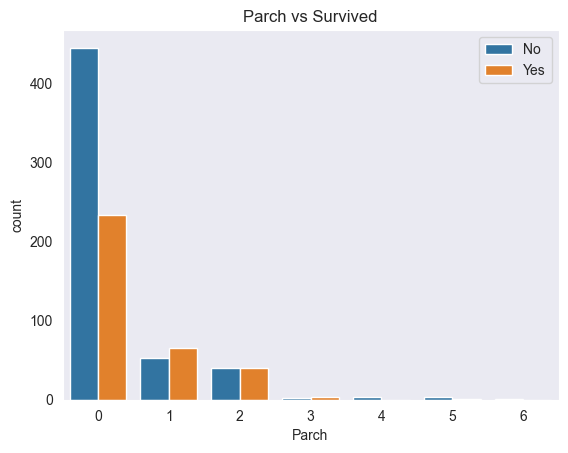

In [86]:
sns.countplot(x=train['Parch'],hue=train['Survived'])
plt.legend(['No','Yes'])
plt.xlabel('Parch')
plt.title('Parch vs Survived');

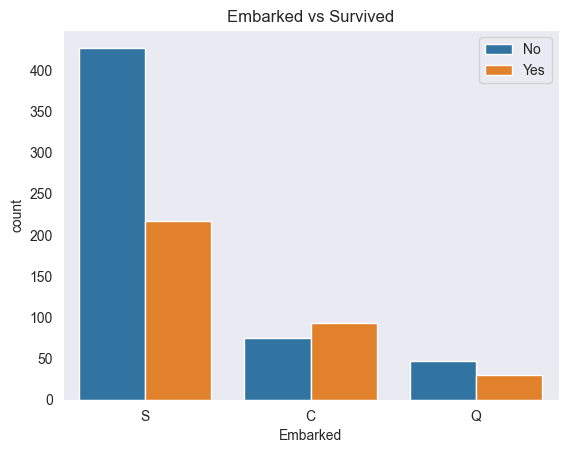

In [87]:
sns.countplot(x = train['Embarked'],hue=train['Survived'])
plt.legend(['No','Yes'])
plt.xlabel('Embarked')
plt.title('Embarked vs Survived');

In [88]:
train.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [89]:
train.groupby('Survived').describe()['Fare'].T

Survived,0,1
count,549.000000,342.000000
mean,22.117887,48.395408
std,31.388207,66.596998
min,0.000000,0.000000
25%,7.854200,12.475000
50%,10.500000,26.000000
75%,26.000000,57.000000
max,263.000000,512.329200


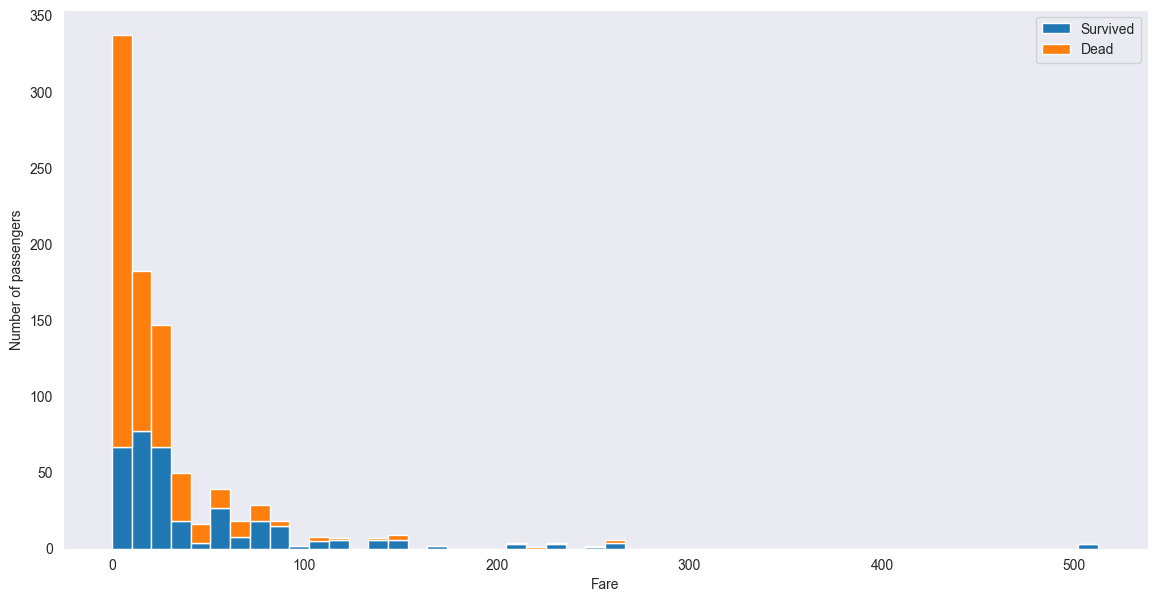

In [90]:
#visualizing survival based on the fare

figure = plt.figure(figsize=(14, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<Axes: xlabel='Sex', ylabel='count'>

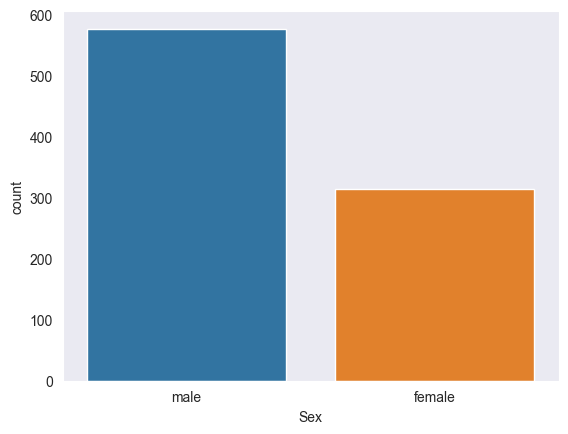

In [91]:
 #countplot
sns.countplot(x='Sex', data=train)

In [92]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

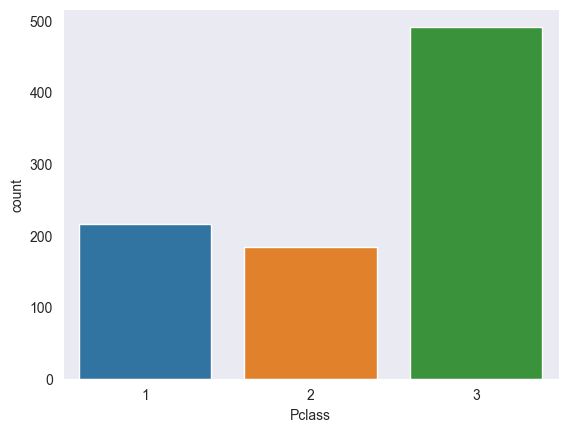

In [93]:
sns.countplot(x='Pclass', data=train)

In [94]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

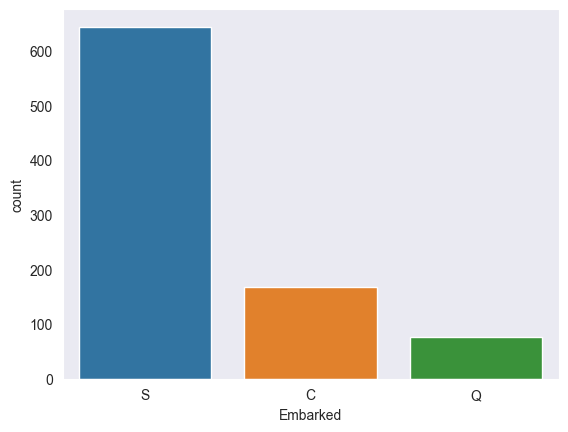

In [95]:
sns.countplot(x='Embarked', data=train)

In [96]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

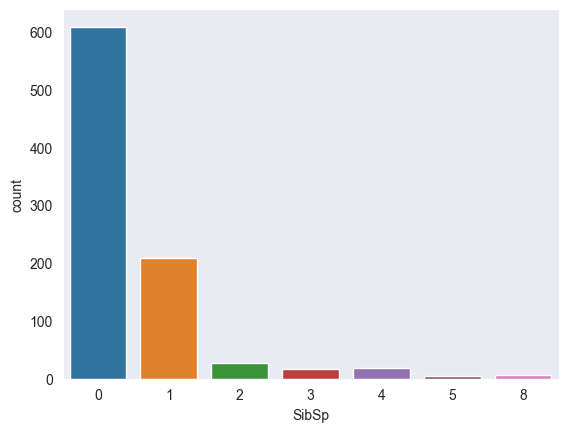

In [97]:
sns.countplot(x='SibSp', data=train)

In [98]:
train['Died'] = 1 - train['Survived']

C:\Users\Tesly Sabastian\AppData\Local\Temp\ipykernel_17476\3206342849.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='Sex'>

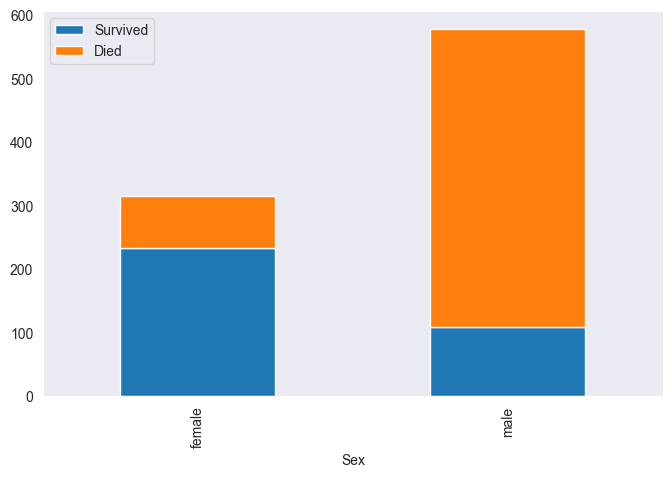

In [99]:
#Visualisating survival based on gender


train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(8, 5),
                                                           stacked=True)


C:\Users\Tesly Sabastian\AppData\Local\Temp\ipykernel_17476\2931514624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='Sex'>

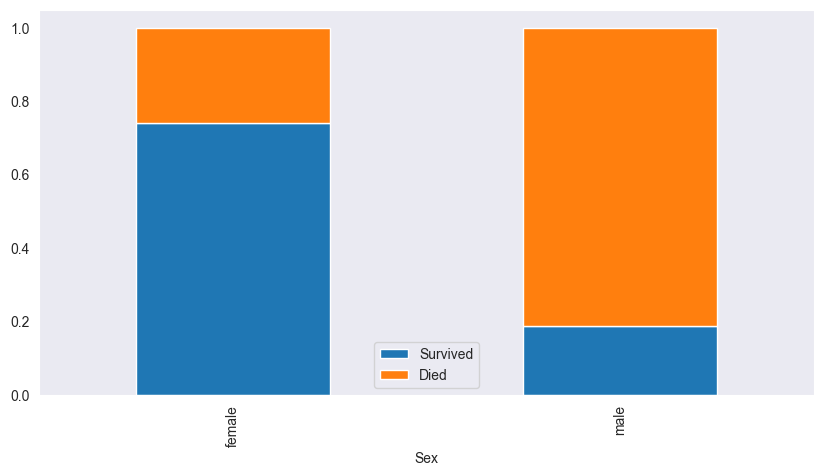

In [100]:
train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                            figsize=(10, 5),
                                                            stacked=True)


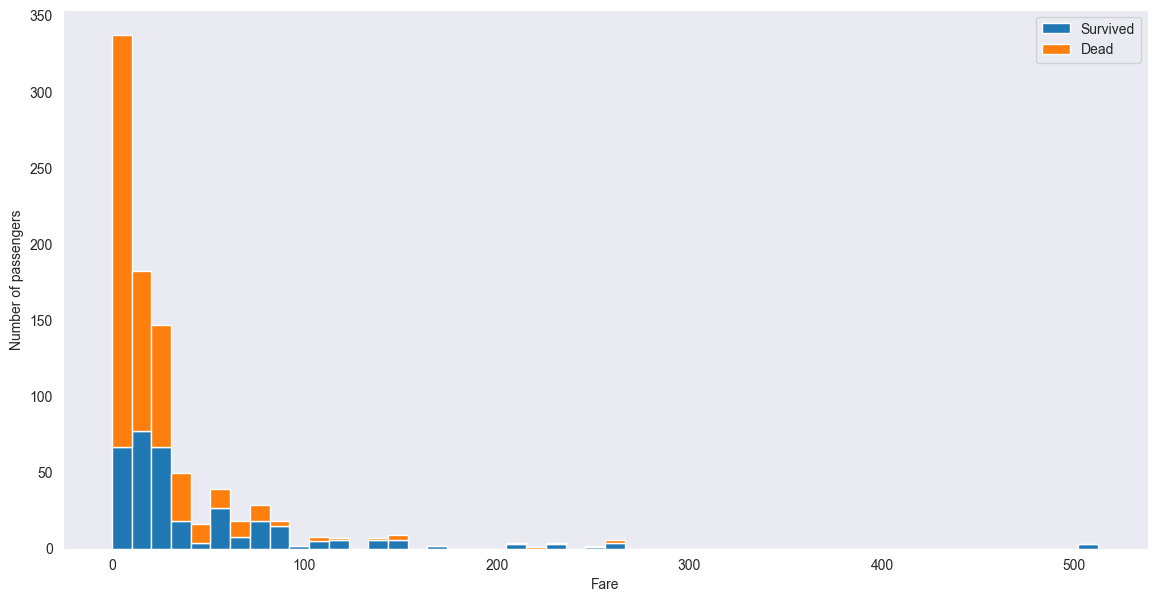

In [101]:
#visualizing survival based on the fare

figure = plt.figure(figsize=(14, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [102]:
#Cleaning the train dataset by dropping unwanted columns

df1=train.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [103]:
# Converting categorical feature to numeric

df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [104]:
# median age of each sex

median_age_men=df1[df1['Sex']==1]['Age'].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()

In [105]:
# fill the null values in 'Age' with respective median age

df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women

In [106]:
# checking for null values

df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [107]:
# dropping two rows with null value

df1.dropna(inplace=True)

In [108]:
# Checking again for null values

df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [109]:
# cleaned dataset

df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [110]:
#Feature Scaling

df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.368099,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.162970,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


## Data Modelling

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived)

In [113]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy_score(y_test, Y_pred)


0.8370786516853933

In [114]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

con=confusion_matrix(y_test, Y_pred)
con

array([[97, 13],
       [16, 52]], dtype=int64)

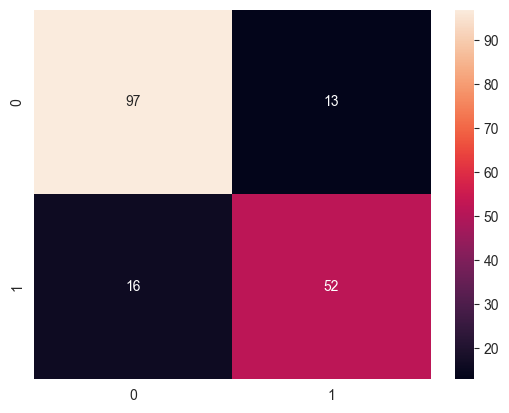

In [115]:
sns.heatmap(con,annot=True)
plt.show()

### Test dataset


In [116]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
# dropping unwanted columns

df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [118]:
# Converting categorical feature to numeric

df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [119]:
# Checking for null values

df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [120]:
# median age of each sex

median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [121]:
# filling null values with respective median age

df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [122]:
# filling null values with median fare

df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [123]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [124]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [125]:
#Feature engineering

def process_age(train):
    train['agefrac'] = ((train.Age>1) & ((train.Age%1)==.5))+0
    display(train[['Age','agefrac']].sort_values(by='agefrac'))
process_age(train)

,Age,agefrac
0,22.0,0
584,30.0,0
585,18.0,0
586,47.0,0
587,60.0,0
...,...,...
122,32.5,1
767,30.5,1
111,14.5,1
676,24.5,1


In [126]:
# feature scaling

df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,2
1,3,0,0.617566,1,0,0.013663,0
2,2,1,0.815377,0,0,0.018909,2
3,3,1,0.353818,0,0,0.016908,0
4,3,0,0.287881,1,1,0.023984,0


### Prediction

In [127]:
pred = model.predict(df2)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [128]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                            "Survived": pred})
submission.to_csv('submission.csv', index=False)

In [129]:
pred_df = pd.read_csv('submission.csv')

<Axes: xlabel='Survived', ylabel='count'>

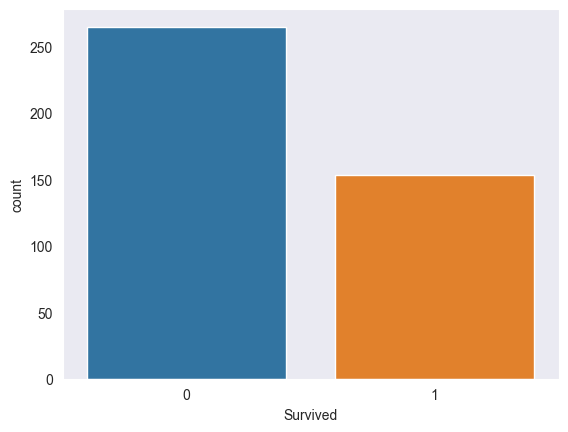

In [130]:
# visualizing predicted values
sns.countplot(x='Survived', data=pred_df)